In [51]:
pip install PySastrawi

     |████████████████████████████████| 210 kB 5.3 MB/s 


In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [125]:
data = {"Kalimat":["Andai aku bisa Menjadi seperti yang kau minta Ku jadi juwita Kala cinta menggoda","Tak peduli jika Surga & neraka tak pernah ada Yang penting kau ada Meski tanpa panah asmara", "Mengapa sabda alam Belum jua satukan kisah Kita bersama","Cintaku bertepuk Harap yang tak ada Rintihan nada asmara Inginku kembali ke masa remaja Serasa galih & ratna Yang kumau kau untukku meskipun kau tak rindu Engkau aku suka",
                   "Aku ingin cinta Tebar semerbak percik pesona Wahai angin malam Bantu aku merepih alam Meskipun kidung ini terlalu Kuyakin badai pasti berlalu Lilin-lilin kecil pun merayu Pijar hatimu","Ternyata cinta di hadapan hatimu Hanya kesenian lain","Cintaku bertepuk Harap yang tak ada Rintihan nada asmara Inginku kembali ke masa remaja Serasa galih & ratna Yang kumau kau untukku meskipun kau tak rindu Engkau aku suka",
                   "Cintaku bertepuk Harap yang tak ada Rintihan nada asmara Kau kehidupanku meski kau tak tahu Ada aku di hidupmu Yang kumau kau untukku meskipun kau tak rindu Engkau aku suka"]}
data

{'Kalimat': ['Andai aku bisa Menjadi seperti yang kau minta Ku jadi juwita Kala cinta menggoda',
  'Tak peduli jika Surga & neraka tak pernah ada Yang penting kau ada Meski tanpa panah asmara',
  'Mengapa sabda alam Belum jua satukan kisah Kita bersama',
  'Cintaku bertepuk Harap yang tak ada Rintihan nada asmara Inginku kembali ke masa remaja Serasa galih & ratna Yang kumau kau untukku meskipun kau tak rindu Engkau aku suka',
  'Aku ingin cinta Tebar semerbak percik pesona Wahai angin malam Bantu aku merepih alam Meskipun kidung ini terlalu Kuyakin badai pasti berlalu Lilin-lilin kecil pun merayu Pijar hatimu',
  'Ternyata cinta di hadapan hatimu Hanya kesenian lain',
  'Cintaku bertepuk Harap yang tak ada Rintihan nada asmara Inginku kembali ke masa remaja Serasa galih & ratna Yang kumau kau untukku meskipun kau tak rindu Engkau aku suka',
  'Cintaku bertepuk Harap yang tak ada Rintihan nada asmara Kau kehidupanku meski kau tak tahu Ada aku di hidupmu Yang kumau kau untukku meskipun 

In [126]:
df = pd.DataFrame(data)
df

,Kalimat
0,Andai aku bisa Menjadi seperti yang kau minta ...
1,Tak peduli jika Surga & neraka tak pernah ada ...
2,Mengapa sabda alam Belum jua satukan kisah Kit...
3,Cintaku bertepuk Harap yang tak ada Rintihan n...
4,Aku ingin cinta Tebar semerbak percik pesona W...
5,Ternyata cinta di hadapan hatimu Hanya kesenia...
6,Cintaku bertepuk Harap yang tak ada Rintihan n...
7,Cintaku bertepuk Harap yang tak ada Rintihan n...


In [127]:
#Case Folding : Merubah karakter menjadi lowercase semua
df["Kalimat"] = df["Kalimat"].str.lower()

In [128]:
#menghilangkan karakter spesial

# function to remove special characters
def remove_special_characters(text):
    # definisi pattern yang ingin tetap ada, disini alphabet dan spasi
    pat = r'[^a-zA-z\s]' 
    return " ".join(re.sub(pat, '', text).split())

df["clean"] = df["Kalimat"].apply(remove_special_characters)
df.head()

,Kalimat,clean
0,andai aku bisa menjadi seperti yang kau minta ...,andai aku bisa menjadi seperti yang kau minta ...
1,tak peduli jika surga & neraka tak pernah ada ...,tak peduli jika surga neraka tak pernah ada ya...
2,mengapa sabda alam belum jua satukan kisah kit...,mengapa sabda alam belum jua satukan kisah kit...
3,cintaku bertepuk harap yang tak ada rintihan n...,cintaku bertepuk harap yang tak ada rintihan n...
4,aku ingin cinta tebar semerbak percik pesona w...,aku ingin cinta tebar semerbak percik pesona w...


In [129]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#membuat fungsi stemmer
def words_stemmer(text):
    return stemmer.stem(text)

df["stem"] = df["clean"].apply(words_stemmer)
df.head()

,Kalimat,clean,stem
0,andai aku bisa menjadi seperti yang kau minta ...,andai aku bisa menjadi seperti yang kau minta ...,andai aku bisa jadi seperti yang kau minta ku ...
1,tak peduli jika surga & neraka tak pernah ada ...,tak peduli jika surga neraka tak pernah ada ya...,tak peduli jika surga neraka tak pernah ada ya...
2,mengapa sabda alam belum jua satukan kisah kit...,mengapa sabda alam belum jua satukan kisah kit...,mengapa sabda alam belum jua satu kisah kita sama
3,cintaku bertepuk harap yang tak ada rintihan n...,cintaku bertepuk harap yang tak ada rintihan n...,cinta tepuk harap yang tak ada rintih nada asm...
4,aku ingin cinta tebar semerbak percik pesona w...,aku ingin cinta tebar semerbak percik pesona w...,aku ingin cinta tebar semerbak percik pesona w...


In [130]:
#import module tokenizer
from nltk.tokenize import word_tokenize 

#membuat fungsi tokenizer
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df["tokens"] = df["stem"].apply(word_tokenize_wrapper)

df["tokens"].head()

0    [andai, aku, bisa, jadi, seperti, yang, kau, m...
1    [tak, peduli, jika, surga, neraka, tak, pernah...
2    [mengapa, sabda, alam, belum, jua, satu, kisah...
3    [cinta, tepuk, harap, yang, tak, ada, rintih, ...
4    [aku, ingin, cinta, tebar, semerbak, percik, p...
Name: tokens, dtype: object

In [131]:
#memanggil module untuk stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
more_stopword = ["kau", "engkau","ku"]
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
print(data)
print(type(data))

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [132]:
#membuat list yang menampung tiap kata

fineclean = []        #list yang difilter dengan stopword
justclean = []        #list yang tidak difilter
for i in df['tokens']:
  for j in i:
    justclean.append(j)
    if j not in data:
      fineclean.append(j)
      
print(justclean)
print(fineclean)

['andai', 'aku', 'bisa', 'jadi', 'seperti', 'yang', 'kau', 'minta', 'ku', 'jadi', 'juwita', 'kala', 'cinta', 'goda', 'tak', 'peduli', 'jika', 'surga', 'neraka', 'tak', 'pernah', 'ada', 'yang', 'penting', 'kau', 'ada', 'meski', 'tanpa', 'panah', 'asmara', 'mengapa', 'sabda', 'alam', 'belum', 'jua', 'satu', 'kisah', 'kita', 'sama', 'cinta', 'tepuk', 'harap', 'yang', 'tak', 'ada', 'rintih', 'nada', 'asmara', 'ingin', 'kembali', 'ke', 'masa', 'remaja', 'serasa', 'galih', 'ratna', 'yang', 'mau', 'kau', 'untuk', 'meski', 'kau', 'tak', 'rindu', 'engkau', 'aku', 'suka', 'aku', 'ingin', 'cinta', 'tebar', 'semerbak', 'percik', 'pesona', 'wahai', 'angin', 'malam', 'bantu', 'aku', 'repih', 'alam', 'meski', 'kidung', 'ini', 'terlalu', 'yakin', 'badai', 'pasti', 'lalu', 'lilinlilin', 'kecil', 'pun', 'rayu', 'pijar', 'hati', 'nyata', 'cinta', 'di', 'hadap', 'hati', 'hanya', 'seni', 'lain', 'cinta', 'tepuk', 'harap', 'yang', 'tak', 'ada', 'rintih', 'nada', 'asmara', 'ingin', 'kembali', 'ke', 'masa', '

In [140]:
#membuat tiap kata (token) menjadi satu kalimat string

w1 = ""   #inisiasi variabel kosong untuk tanpa filter
for i in justclean:
  w1 += "".join(i)+" "
print("Tanpa filter stopword:\n",w1,"\n\n")

w2 = ""   #inisiasi variabel kosong untuk dengan filter
for i in fineclean:
  w2 += "".join(i)+" "
print("Dengan filter stopword:\n",w2)

Tanpa filter stopword:
 andai aku bisa jadi seperti yang kau minta ku jadi juwita kala cinta goda tak peduli jika surga neraka tak pernah ada yang penting kau ada meski tanpa panah asmara mengapa sabda alam belum jua satu kisah kita sama cinta tepuk harap yang tak ada rintih nada asmara ingin kembali ke masa remaja serasa galih ratna yang mau kau untuk meski kau tak rindu engkau aku suka aku ingin cinta tebar semerbak percik pesona wahai angin malam bantu aku repih alam meski kidung ini terlalu yakin badai pasti lalu lilinlilin kecil pun rayu pijar hati nyata cinta di hadap hati hanya seni lain cinta tepuk harap yang tak ada rintih nada asmara ingin kembali ke masa remaja serasa galih ratna yang mau kau untuk meski kau tak rindu engkau aku suka cinta tepuk harap yang tak ada rintih nada asmara kau hidup meski kau tak tahu ada aku di hidup yang mau kau untuk meski kau tak rindu engkau aku suka  


Dengan filter stopword:
 andai juwita cinta goda peduli surga neraka panah asmara sabda al

In [141]:
#menghitung frekuensi kemunculan
from nltk.probability import FreqDist

kemunculan1 = nltk.FreqDist(justclean) #tanpa filter 
print("Tanpa filter stopword:\n",kemunculan1.most_common(),"\n\n")

kemunculan2 = nltk.FreqDist(fineclean) #dengan filter 
print("Dengan filter stopword:\n",kemunculan2.most_common())

Tanpa filter stopword:
 [('kau', 10), ('tak', 9), ('yang', 8), ('aku', 7), ('cinta', 6), ('ada', 6), ('meski', 6), ('asmara', 4), ('tepuk', 3), ('harap', 3), ('rintih', 3), ('nada', 3), ('ingin', 3), ('mau', 3), ('untuk', 3), ('rindu', 3), ('engkau', 3), ('suka', 3), ('jadi', 2), ('alam', 2), ('kembali', 2), ('ke', 2), ('masa', 2), ('remaja', 2), ('serasa', 2), ('galih', 2), ('ratna', 2), ('hati', 2), ('di', 2), ('hidup', 2), ('andai', 1), ('bisa', 1), ('seperti', 1), ('minta', 1), ('ku', 1), ('juwita', 1), ('kala', 1), ('goda', 1), ('peduli', 1), ('jika', 1), ('surga', 1), ('neraka', 1), ('pernah', 1), ('penting', 1), ('tanpa', 1), ('panah', 1), ('mengapa', 1), ('sabda', 1), ('belum', 1), ('jua', 1), ('satu', 1), ('kisah', 1), ('kita', 1), ('sama', 1), ('tebar', 1), ('semerbak', 1), ('percik', 1), ('pesona', 1), ('wahai', 1), ('angin', 1), ('malam', 1), ('bantu', 1), ('repih', 1), ('kidung', 1), ('ini', 1), ('terlalu', 1), ('yakin', 1), ('badai', 1), ('pasti', 1), ('lalu', 1), ('lilin

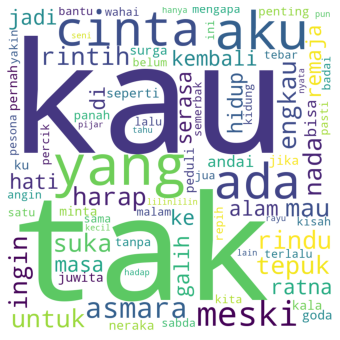

In [113]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(width = 900, height = 900, background_color ='white', min_font_size = 10).generate(w1)  
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
  
plt.show()

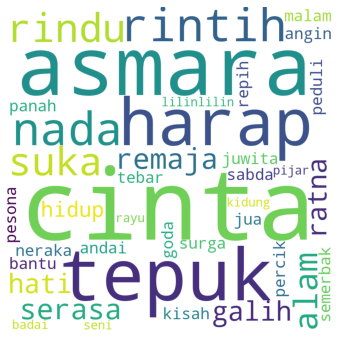

In [119]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud2 = WordCloud(width = 900, height = 900, background_color ='white', min_font_size = 10).generate(w2)  
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
  
plt.show()

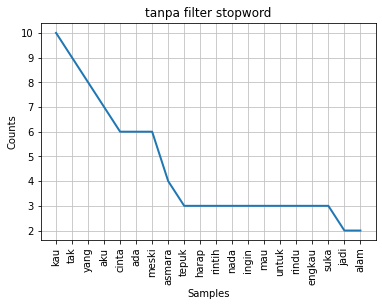

In [142]:
kemunculan1.plot(20,cumulative=False, title ="tanpa filter stopword")
plt.show()

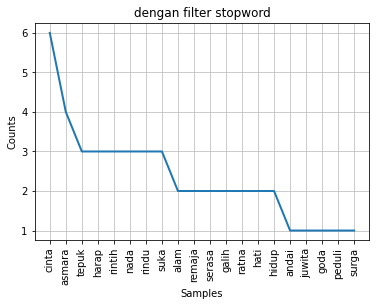

In [143]:
kemunculan2.plot(20,cumulative=False, title ="dengan filter stopword")
plt.show()

In [144]:
df.head()

,Kalimat,clean,stem,tokens
0,andai aku bisa menjadi seperti yang kau minta ...,andai aku bisa menjadi seperti yang kau minta ...,andai aku bisa jadi seperti yang kau minta ku ...,"[andai, aku, bisa, jadi, seperti, yang, kau, m..."
1,tak peduli jika surga & neraka tak pernah ada ...,tak peduli jika surga neraka tak pernah ada ya...,tak peduli jika surga neraka tak pernah ada ya...,"[tak, peduli, jika, surga, neraka, tak, pernah..."
2,mengapa sabda alam belum jua satukan kisah kit...,mengapa sabda alam belum jua satukan kisah kit...,mengapa sabda alam belum jua satu kisah kita sama,"[mengapa, sabda, alam, belum, jua, satu, kisah..."
3,cintaku bertepuk harap yang tak ada rintihan n...,cintaku bertepuk harap yang tak ada rintihan n...,cinta tepuk harap yang tak ada rintih nada asm...,"[cinta, tepuk, harap, yang, tak, ada, rintih, ..."
4,aku ingin cinta tebar semerbak percik pesona w...,aku ingin cinta tebar semerbak percik pesona w...,aku ingin cinta tebar semerbak percik pesona w...,"[aku, ingin, cinta, tebar, semerbak, percik, p..."
